In [16]:
import datetime
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
from matplotlib import style
from subprocess import check_output

import models
import utils
import visuals

warnings.filterwarnings("ignore")
style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [17]:
input_dir = '../input'
print('Choose a file from the following list: \n')
print(check_output(["ls", input_dir]).decode("utf8"))

Choose a file from the following list: 

bitcoin_cash_price.csv
bitcoin_dataset.csv
bitcoin_price.csv
bitconnect_price.csv
dash_price.csv
ethereum_classic_price.csv
ethereum_dataset.csv
ethereum_price.csv
iota_price.csv
litecoin_price.csv
monero_price.csv
nem_price.csv
neo_price.csv
numeraire_price.csv
omisego_price.csv
qtum_price.csv
ripple_price.csv
stratis_price.csv
waves_price.csv



In [18]:
print('Enter Currency File Name: ')
name = input()
# name = 'bitcoin_price.csv'

x_train, x_test, x_recent, y_train, y_test, df = utils.load_data(input_dir, name)
print('---------------------------------------')
print(x_train.shape[0], 'training samples.' )
print(x_test.shape[0], 'test samples.' )
print('Predicting {} days'.format(x_recent.shape[0]))
print('Train sample shape: ', x_train.shape)
print('Test sample shape: ', x_test.shape)
print('Train label shape:', y_train.shape)
print('Test label shape:', y_test.shape)

Enter Currency File Name: 
bitcoin_price.csv
---------------------------------------
1260 training samples.
316 test samples.
Predicting 16 days
Train sample shape:  (1260, 6)
Test sample shape:  (316, 6)
Train label shape: (1260,)
Test label shape: (316,)


Choose Model: [1]LinearRegression [2]SVR [3]MLP

2
Support Vector Regression model selected.

Choose op: [1]Train, [2]Test, [3]Predict.

3
Predicting future values...

Predicted Values: [ 4000.45448505  3936.57613997  4102.03798942  4207.34568417  4321.04640911
  4295.38198766  4319.81464397  4301.28000865  4444.76224971  4507.92148673
  4590.72405076  4744.85731576  4664.2992074   4523.65104907  4318.04174858
  4216.68647947]
Forecast Plot


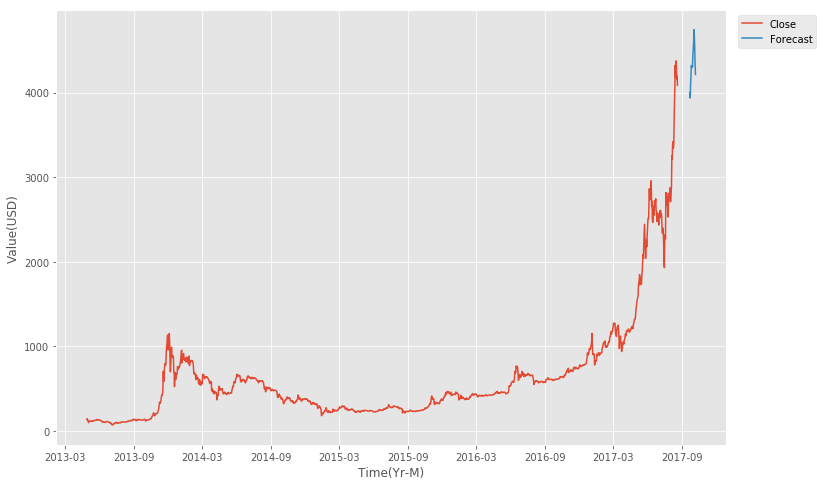

In [28]:
"""
Choose model type:
1. Linear Regression
2. Support Vector Regression
3. Multilayer Perceptron
"""
print('Choose Model: [1]LinearRegression [2]SVR [3]MLP\n')
choice = int(input())
# choice = 3

if choice == 1: 
    model = models.LR(x_train, y_train, x_test, y_test, x_recent)
    print('Linear Regression model selected.\n')
elif choice == 2:
    model = models.SVR(x_train, y_train, x_test, y_test, x_recent)
    print('Support Vector Regression model selected.\n')
elif choice == 3:
    model = models.MLP(x_train, y_train, x_test, y_test, x_recent)
    model.build()
    print('Multilayer Perceptron model selected.\n')

""" 
Choose operation type:
1. Train the model on training set
2. Evaluate metric on test set
3. Forecast prediction 
"""
print('Choose op: [1]Train, [2]Test, [3]Predict.\n')
op = int(input())
# op = 3

if op == 1:
    print('Training initiated...\n')
    model.train()
elif op == 2:
    print('Evaluating model on test data...\n')
    model.test()
elif op == 3:
    print('Predicting future values...\n')
    preds = model.predict()
    print('Forecast Plot')
    utils.forecast_plot(df, preds)

In [22]:
# Visualization
currencies = visuals.load()

In [23]:
# Target currency type and target feature(s)
coin_type = 'bitcoin'
coin_feat = ['Close']

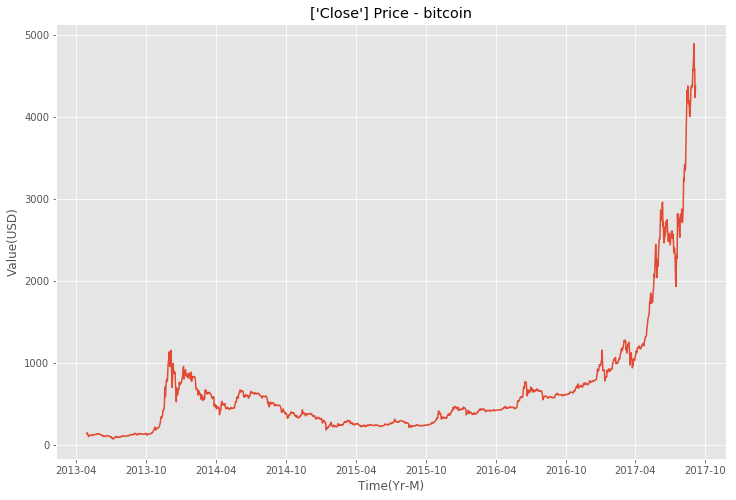

In [24]:
# Trend 
visuals.plot_trend(currencies, coin_type, coin_feat)

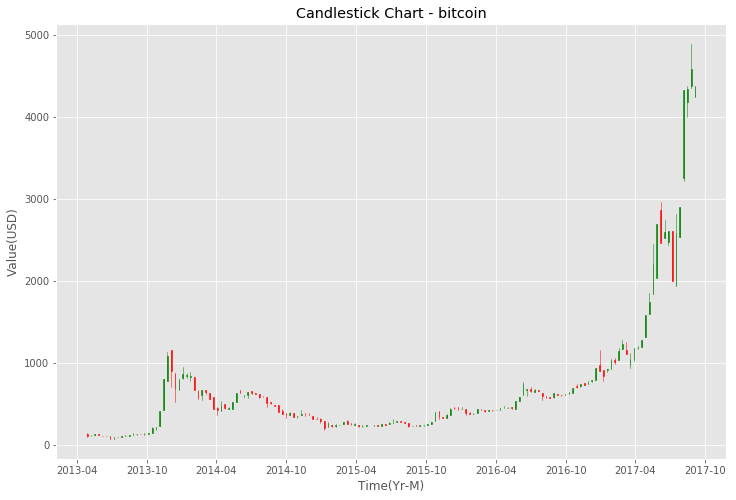

In [25]:
# Candlestick
visuals.plot_candlestick(currencies, coin_type, coin_feat)

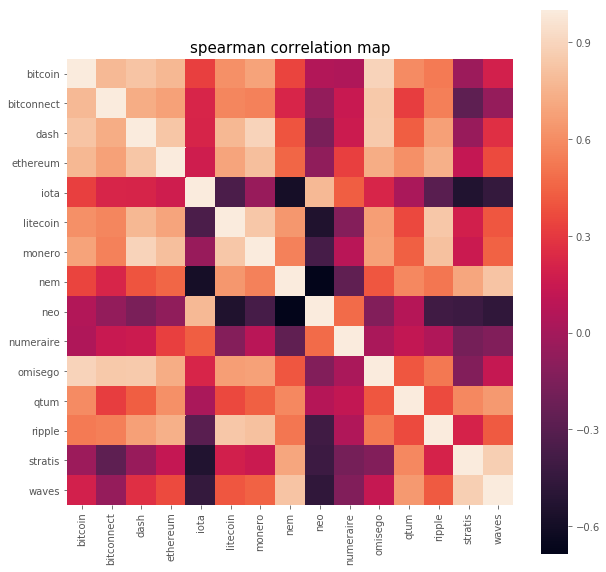

In [26]:
# spearman correlation
visuals.plot_correlation()

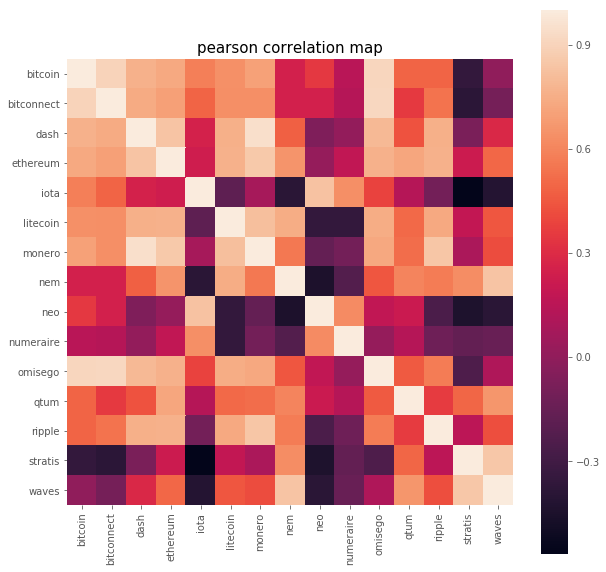

In [7]:
# pearson correlation
visuals.plot_correlation('pearson')

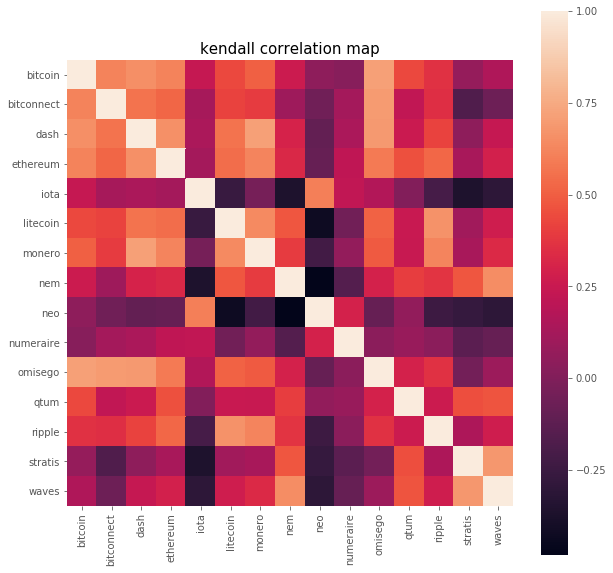

In [8]:
# kendall correlation
visuals.plot_correlation('kendall')